In [2]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Step 2: Load the CSV data
url = 'https://raw.githubusercontent.com/drewdcaldwell/NDMN_BasfMarketMods/main/new_merged_data.csv'
data = pd.read_csv(url)
print(data.columns)

Index(['year', 'Average Food sales', 'Annual Nominal GDP Index',
       'Annual Real GDP Index', 'Consumer Index', 'unemployment rate',
       'Building permits in U.S.', 'average_temperature',
       'average_relativehumidity', 'pest control revenue',
       '(United States) Houses for Sale', '(United States) Houses Sold',
       'Median Prices Of New Homes Sold', 'Average Prices Of New Homes Sold',
       'SP500_Open', 'SP500_High', 'SP500_Low', 'SP500_Close',
       'SP500_Adj_Close', 'SP500_Volume', 'total_precipitation'],
      dtype='object')


In [7]:
# Step 3: Clean the data
# Identify columns that need cleaning (you can adjust this based on your actual DataFrame)
for col in data.select_dtypes(include=['object']).columns:
    # Remove currency symbols and commas, then convert to numeric
    data[col] = data[col].replace({'\$': '', ',': ''}, regex=True).str.strip()
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Step 4: Calculate the correlation matrix
correlation_matrix = data.corr()

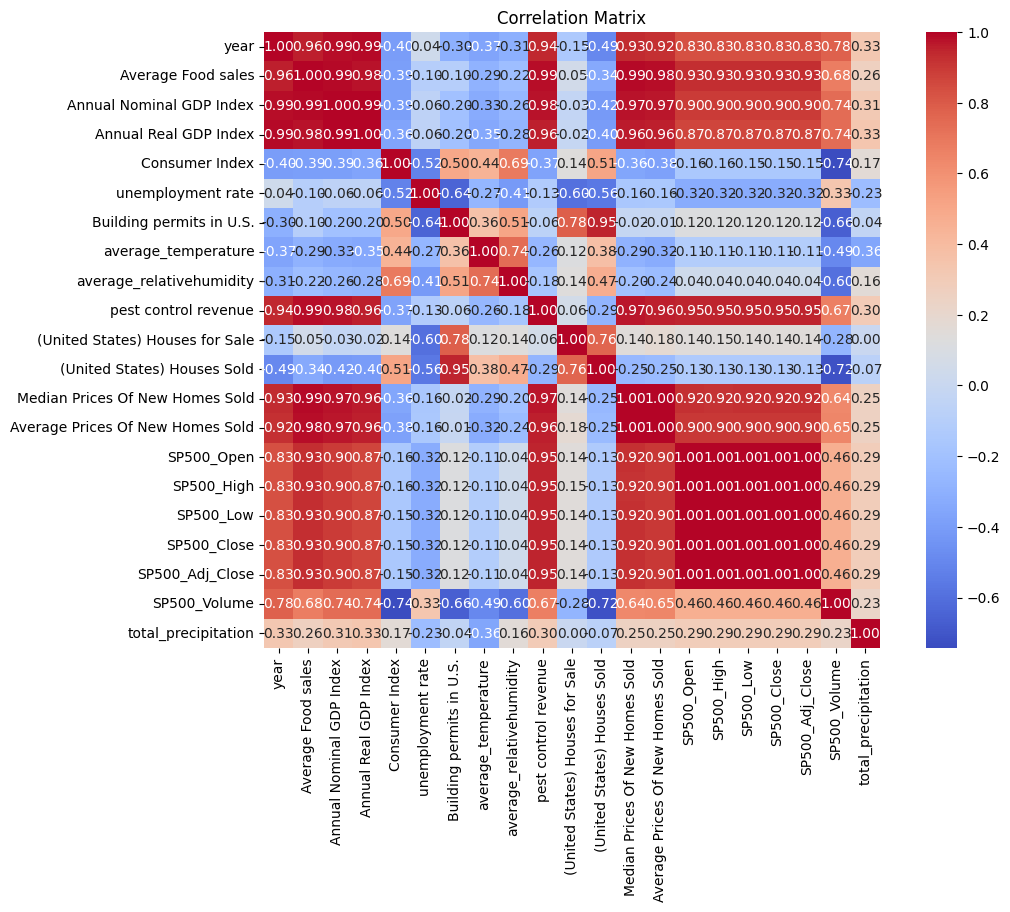

In [8]:
# Step 4: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

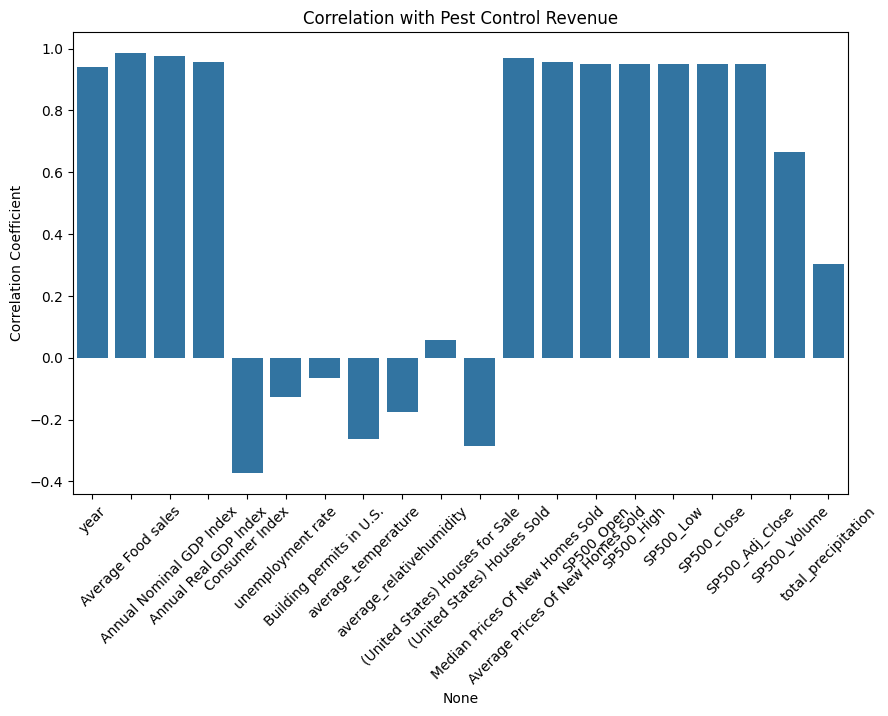

In [14]:
# Step 3: Clean the data
for col in data.select_dtypes(include=['object']).columns:
    # Remove currency symbols and commas, then convert to numeric
    data[col] = data[col].replace({'\$': '', ',': ''}, regex=True).str.strip()
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Step 4: Specify the revenue column
revenue_column = 'pest control revenue'  # Ensure this is correct

# Step 5: Check if the column exists
if revenue_column in data.columns:
    # Ensure the revenue column is numeric
    data[revenue_column] = pd.to_numeric(data[revenue_column], errors='coerce')
    
    # Calculate correlation of the revenue column with all other numerical columns
    correlation_with_revenue = data.corr()[revenue_column]
    
    # Drop the correlation of the revenue column with itself
    correlation_with_revenue = correlation_with_revenue.drop(revenue_column)

    # Step 6: Visualize the correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_with_revenue.index, y=correlation_with_revenue.values)
    plt.title('Correlation with Pest Control Revenue')
    plt.xticks(rotation=45)
    plt.ylabel('Correlation Coefficient')
    plt.show()
else:
    print(f"Column '{revenue_column}' not found in the DataFrame.")

Top features correlated with Pest Control Revenue:
Average Food sales                  0.985548
Annual Nominal GDP Index            0.976347
Median Prices Of New Homes Sold     0.968547
Annual Real GDP Index               0.957636
Average Prices Of New Homes Sold    0.957485
SP500_Close                         0.950482
SP500_Adj_Close                     0.950482
SP500_Open                          0.950478
SP500_Low                           0.950475
SP500_High                          0.950452
Name: pest control revenue, dtype: float64


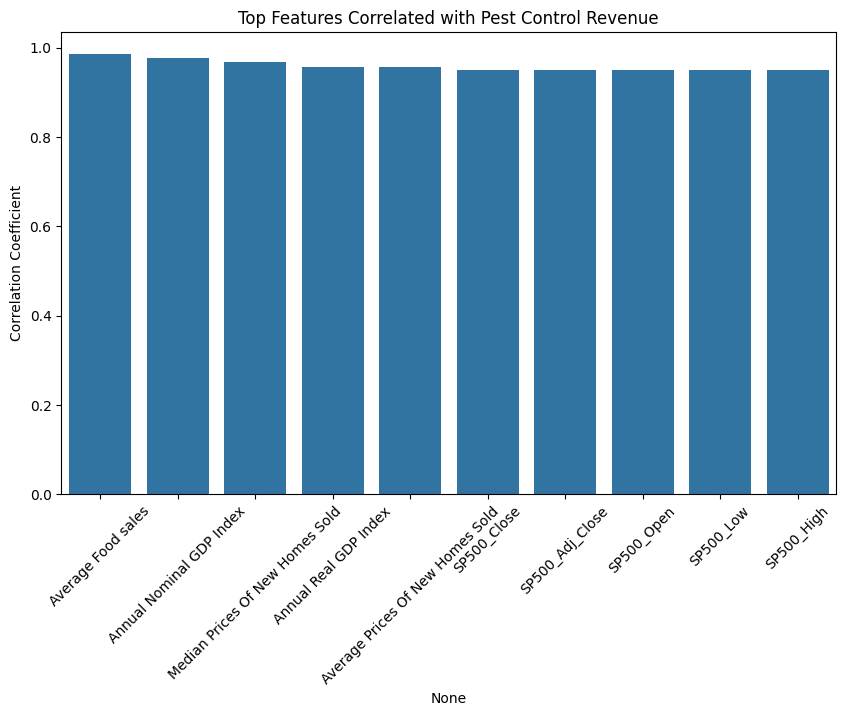

In [15]:

# Step 5: Check if the column exists
if revenue_column in data.columns:
    # Ensure the revenue column is numeric
    data[revenue_column] = pd.to_numeric(data[revenue_column], errors='coerce')
    
    # Calculate correlation of the revenue column with all other numerical columns
    correlation_with_revenue = data.corr()[revenue_column]
    
    # Drop the correlation of the revenue column with itself
    correlation_with_revenue = correlation_with_revenue.drop(revenue_column)

    # Step 6: Sort the correlations and select the top features
    top_correlations = correlation_with_revenue.abs().sort_values(ascending=False).head(10)  # Top 10 features

    # Step 7: Display the top correlations
    print("Top features correlated with Pest Control Revenue:")
    print(top_correlations)

    # Optional: Visualize the top correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_correlations.index, y=top_correlations.values)
    plt.title('Top Features Correlated with Pest Control Revenue')
    plt.xticks(rotation=45)
    plt.ylabel('Correlation Coefficient')
    plt.show()
else:
    print(f"Column '{revenue_column}' not found in the DataFrame.")